In [1]:
import pandas as pd
import numpy as np


In [2]:
# from google.colab import drive
# drive.mount('/drive')

In [3]:
# df=pd.read_csv('/drive/My Drive/spam.csv')
# /drive/My Drive/Datasets/Placement_Data.csv
df=pd.read_csv('SMSSpamCollection.csv')

In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## 1- Data Cleaning

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [10]:
df.rename(columns={'v1':'Spam_detact','v2':'Message Text'},inplace=True)

In [11]:
df.head()

,Spam_detact,Message Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

In [13]:
df['Spam_detact']=LabelEncoder.fit_transform(df['Spam_detact'])

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df

,Spam_detact,Message Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# EDA- Exploraty Data Analysis

In [18]:
df['Spam_detact'].value_counts()

0    4516
1     653
Name: Spam_detact, dtype: int64

In [19]:
import matplotlib.pyplot as plt

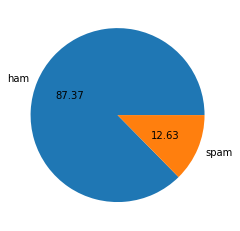

In [20]:
plt.pie(df['Spam_detact'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [21]:
pip install nltk

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['charactor_len']=df['Message Text'].apply(len)

In [25]:
df['Message Text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Message Text, Length: 5169, dtype: int64

In [26]:
df['words_num']=df['Message Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df['sentence_num']=df['Message Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df['Message Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Message Text, Length: 5169, dtype: int64

In [29]:
cols=['charactor_len','words_num','sentence_num']

In [30]:
for i in cols:
    print(df[i].value_counts())

22     91
24     91
32     90
23     86
38     82
       ..
375     1
431     1
2       1
790     1
273     1
Name: charactor_len, Length: 274, dtype: int64
8      338
7      315
9      275
11     262
6      255
      ... 
102      1
90       1
175      1
89       1
65       1
Name: words_num, Length: 91, dtype: int64
1     2605
2     1321
3      666
4      304
5      158
6       65
7       30
8        7
11       4
10       3
9        3
28       1
16       1
13       1
Name: sentence_num, dtype: int64


In [31]:
df.describe()

,Spam_detact,charactor_len,words_num,sentence_num
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [32]:
import seaborn as sns

In [33]:
df[df['Spam_detact']==1].describe()

,Spam_detact,charactor_len,words_num,sentence_num
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


In [34]:
df[df['Spam_detact']==0].describe()

,Spam_detact,charactor_len,words_num,sentence_num
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [35]:
import seaborn as sns

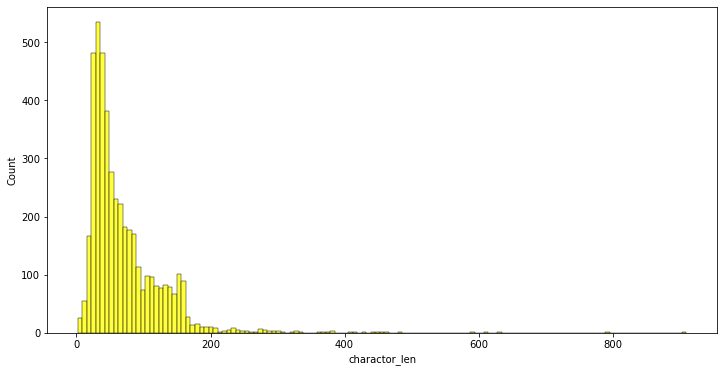

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Spam_detact']==0]['charactor_len'],color='yellow')
plt.show()

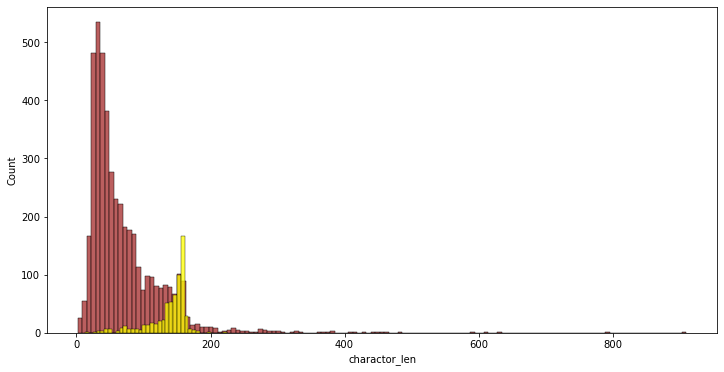

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Spam_detact']==0]['charactor_len'],color='brown')
sns.histplot(df[df['Spam_detact']==1]['charactor_len'],color='yellow')
plt.show()

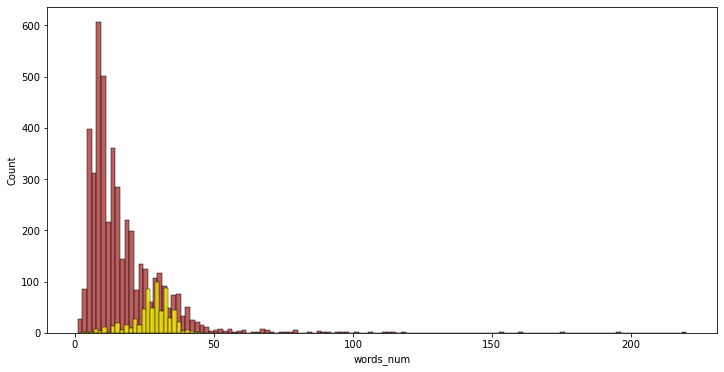

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Spam_detact']==0]['words_num'],color='brown')
sns.histplot(df[df['Spam_detact']==1]['words_num'],color='yellow')
plt.show()

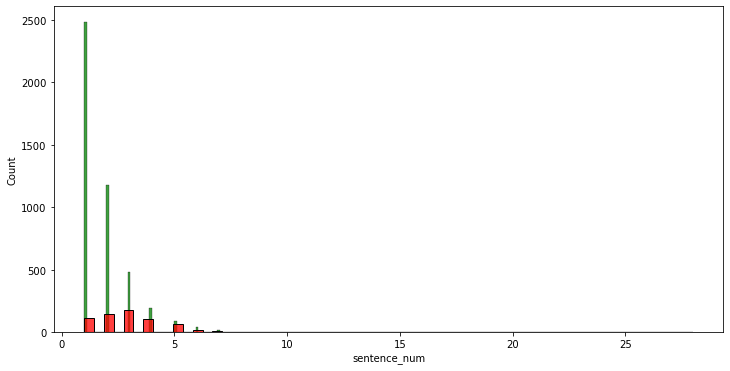

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Spam_detact']==0]['sentence_num'],color='green')
sns.histplot(df[df['Spam_detact']==1]['sentence_num'],color='red')
plt.show()

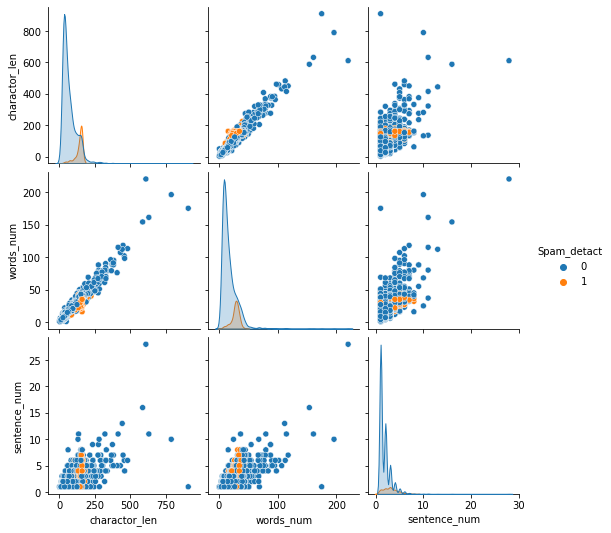

In [40]:
sns.pairplot(df,hue='Spam_detact')
plt.show()

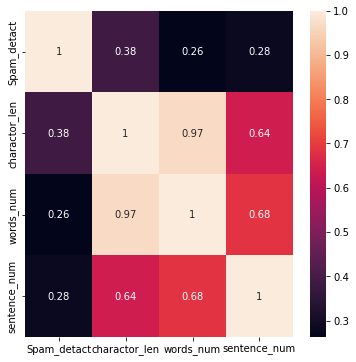

In [41]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Preprocsing
### 1-Lower Case
### 2-Tokenization
### 3-Removing Special Charactors
### 4-Removing Stop Words and punctuation
### 5-Stemming

In [42]:
def transform_text(text):
    text=text.lower()
    return text

In [43]:
transform_text('HIMBksdjflsdkdfmvHKLN')

'himbksdjflsdkdfmvhkln'

In [44]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    x=[]
    for i in text:
        if i.isalnum():
            x.append(i)
    
    return x

In [45]:
transform_text('I Am the Great !!! 20%%% PROBlem Solver &^$3 ^ ssf')

['i', 'am', 'the', 'great', '20', 'problem', 'solver', '3', 'ssf']

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [50]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    x=[]
    for i in text:
        if i.isalnum():
            x.append(i)
    text = x[:]
    x.clear()
    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        x.append(i)
    text=x[:]
    x.clear()
    for i in text:
      x.append(ps.stem(i))
    
    return " ".join(x)

In [51]:
# transform_text('Hii how are you Himanshu Khandelwal &3 $&(^* I LoVEd Ml lectue how aboout you?')

In [52]:
transform_text('Have You Completed Your Work @$%% 452)*Y')

'complet work 452'

In [53]:
ps.stem('loving')

'love'

In [54]:
df['Message Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [55]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [56]:
df['transform_text']=df['Message Text'].apply(transform_text)

In [57]:
df

,Spam_detact,Message Text,charactor_len,words_num,sentence_num,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [58]:
!pip install wordcloud

In [59]:
from wordcloud import WordCloud


In [60]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [61]:
ham_wc=wc.generate(df[df['Spam_detact']==0]['transform_text'].str.cat(sep=' '))

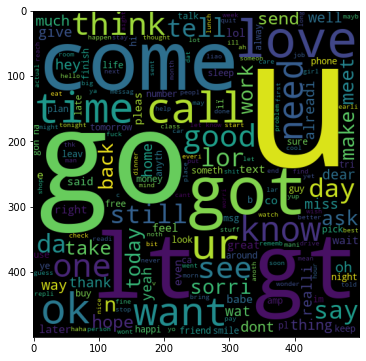

In [62]:
plt.figure(figsize=(6,6))
plt.imshow(ham_wc)

In [63]:
spam_wc=wc.generate(df[df['Spam_detact']==1]['transform_text'].str.cat(sep=' '))

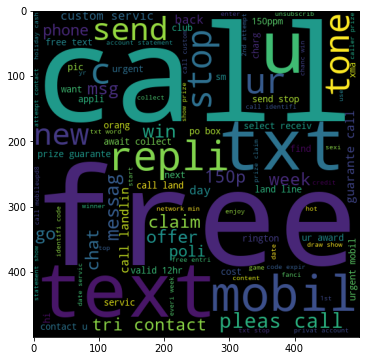

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [65]:
df.head()

,Spam_detact,Message Text,charactor_len,words_num,sentence_num,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
spam_corpus=[]
for msg in df[df['Spam_detact']==1]['transform_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [67]:
len(spam_corpus)

9939

In [68]:
df1=pd.DataFrame(spam_corpus).value_counts()
df1

call       320
free       191
2          155
txt        141
text       122
          ... 
csh11        1
csc          1
cruis        1
cro1327      1
åòit         1
Length: 2222, dtype: int64

In [69]:
from collections import Counter



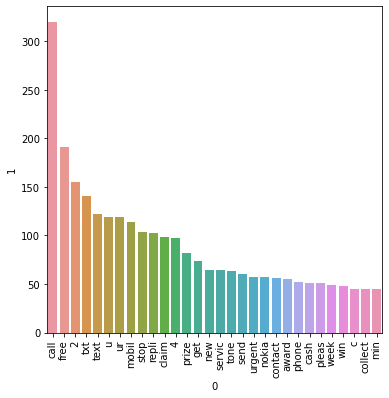

In [70]:
plt.figure(figsize=(6,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [71]:
ham_corpus=[]
for msg in df[df['Spam_detact']==0]['transform_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [72]:
len(ham_corpus)

35394

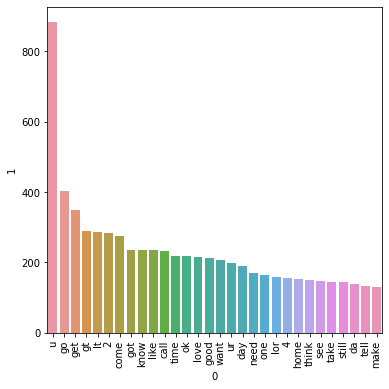

In [73]:
plt.figure(figsize=(6,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Buiding

In [74]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [75]:
X = tfidf.fit_transform(df['transform_text']).toarray()
y = df['Spam_detact'].values



In [76]:
from sklearn.model_selection import train_test_split


In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=55)


In [78]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
mnb=MultinomialNB()
bnb=BernoulliNB()

In [80]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))


0.9642166344294004
[[906   0]
 [ 37  91]]
1.0


In [81]:
# bnb.fit(X_train,y_train)
# y_pred = bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
# print(precision_score(y_test,y_pred))

In [82]:
# TfidfVectorizer ,,,MultinomialNB

# Making Pickle File

In [83]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))